<a href="https://colab.research.google.com/github/NireAstro/1221-dark-matter/blob/main/GravitationalWave/GravitationalWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gwpy # Analyzes gravitational wave signals.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99255 sha256=1de01ea1e4050abbb22875e203e8c48a4adb46edd26eb132325eb2e70673623d
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [3]:
# # -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914 -- Time of a certain gravitational wave event. Note: choose a gw event with a high signal to noise ratio(SNR)
# t0 = 1187008882.4    # -- GW170817

from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478) # Helps us graph a time series centered on the t0. Another way is (t0 - 32.0, t0 + 32.0), which does the same thing as whats in the parentheses.

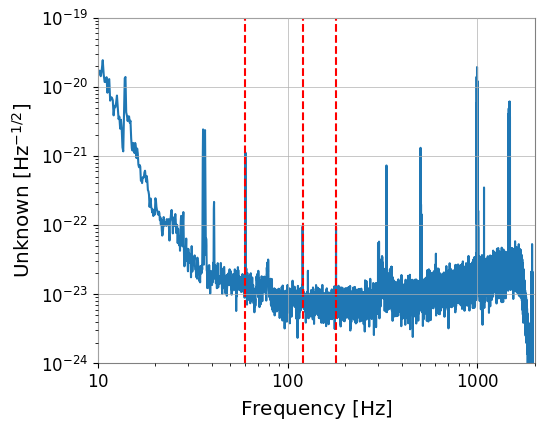

In [6]:
import matplotlib.pyplot as plt

# -- Plot ASD
fig2 = hdata.asd(fftlength=8).plot() # asd is a frequency analysis -- gives the frequency and power -- tells you where in the frequency there is the most power.
plt.xlim(10,2000)
ymin = 1e-24
ymax = 1e-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red") # Marks the 3 unwanted frequencies.
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")
# Note: whenerver there is a peak, there is an event (ac current) happening that is dominating everything, which hides the gw signal.
# Note: choose a section that includes 100Hz where t0 is centered.

In [7]:
from gwpy.signal import filter_design # Filters out the unwanted frquencies
bp = filter_design.bandpass(50, 250, hdata.sample_rate) # frequency window to look for gw signal

notches = [filter_design.notch(line, hdata.sample_rate) for # notch down these frequencies
           line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True)


In [11]:
hdata = hdata.crop(*hdata.span.contract(1)) # crops out the unwanted frequencies and shows the ones we want.
hfilt = hfilt.crop(*hfilt.span.contract(1)) # data after the filtering

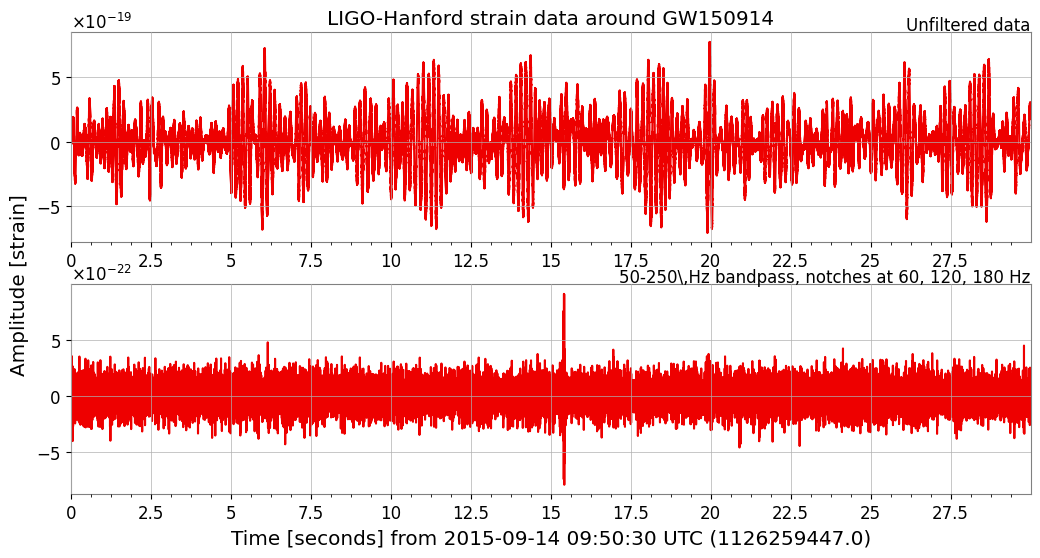

In [10]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW150914')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()
#Note: The top shows the unfiltered frequencies and the bottom shows the filtered frequencies and shows the gw we want.

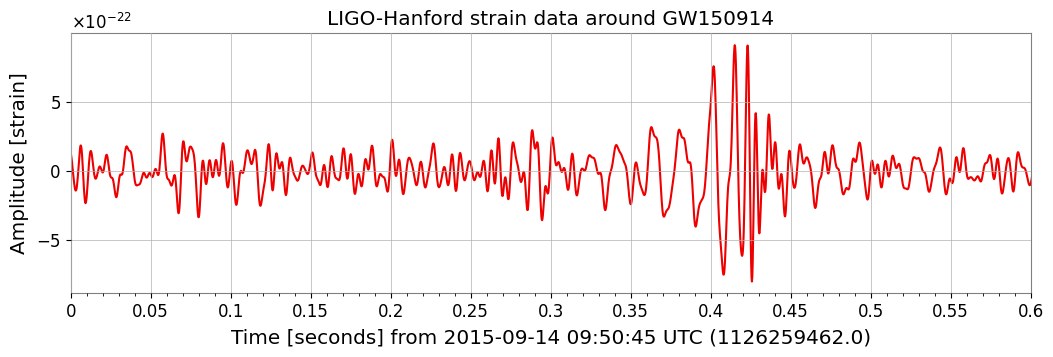

In [13]:
import matplotlib.pyplot as plt

plot = hfilt.plot(color='gwpy:ligo-hanford') # plotting the filtered data
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW150914')
ax.set_ylabel('Amplitude [strain]')
ax.set_xlim(1126259462, 1126259462.6) # -- (t0 - 0.3, t0 + 0.3) -- zoom in to center around t0.
ax.set_xscale('seconds', epoch=1126259462) # set a scale, you can also replace the number for epoch as t0.
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [15]:
ldata = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478) # L refers to another LIGO station that also detects gws.
lfilt = ldata.filter(zpk, filtfilt=True)

In [16]:
lfilt.shift('6.9ms') # L detects the sam gw wave at a different time.
lfilt *= -1

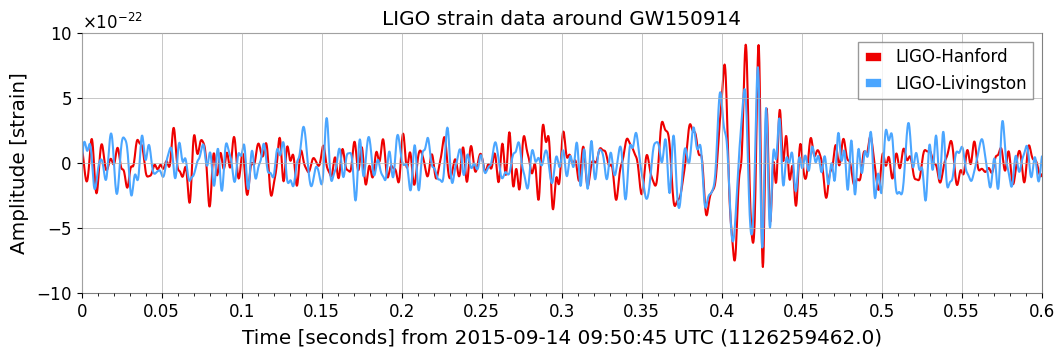

In [17]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford') # Shows the data for both stations.
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW150914')
ax.set_xlim(1126259462, 1126259462.6)
ax.set_xscale('seconds', epoch=1126259462)
ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-1e-21, 1e-21)
ax.legend()
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

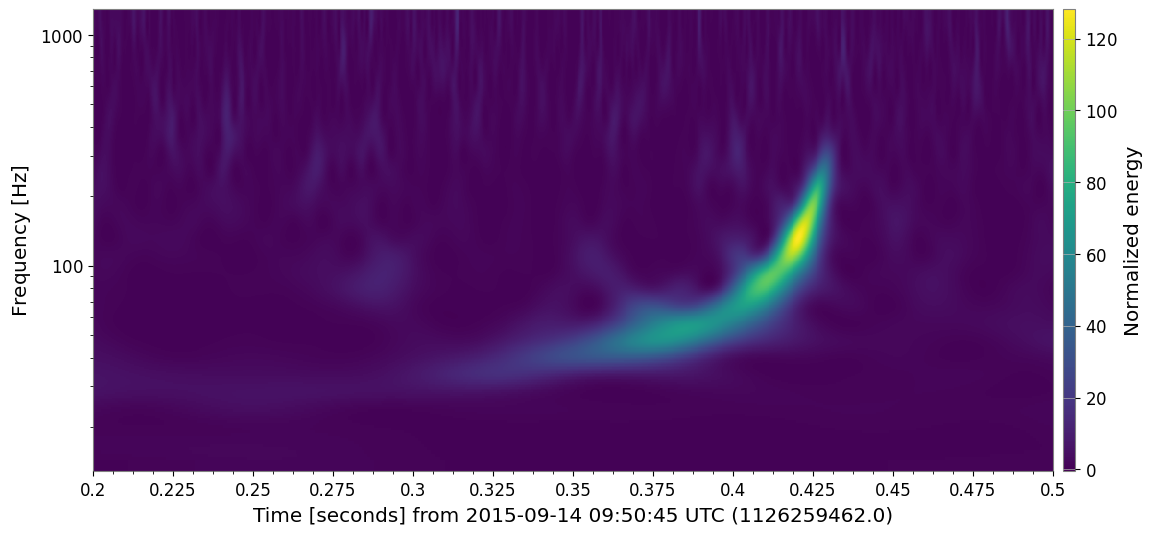

In [18]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')
# Note: shows the intensity and frequency of the gw.

In [20]:
from scipy.io.wavfile import write
import numpy as np

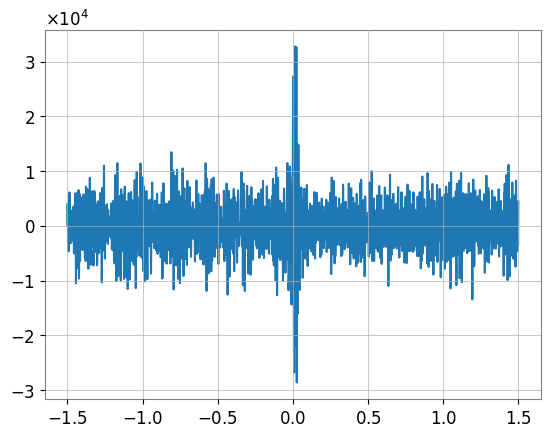

In [26]:
# turn our data into a sound file
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) # x-val will help to select an array entered on t0
y = y_val[ind] #mas y-val is at max amplitude
# y = y**3
y = y / np.max(y)
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

In [28]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) # sampling rate
print("fs = ", fs)
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))
# Note: figure out how to make the sound more like whta we heard in the video we watched on Wednesday.

fs =  4096


In [23]:
from google.colab import files
files.download("example.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Make C

(0.0, 0.1)

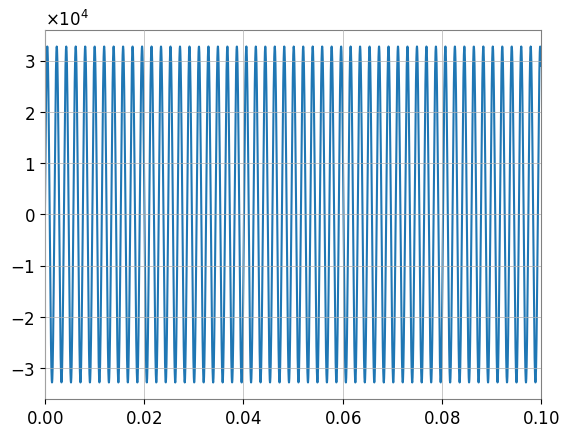

In [24]:
samplerate = 44100; fs = 261.63 * 2.0 # C key (pitch)
t = np.linspace(0., 1., samplerate) # how many segments to break a second into.
amplitude = np.iinfo(np.int16).max # how loud it will be
data = amplitude * np.sin(2. * np.pi * fs * t) # to make a sound youhave to make a wave
plt.plot(t, data) # visualize the data
plt.xlim(0, 0.1)

In [25]:
write("C.wav", samplerate, data.astype(np.int16))
files.download("C.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>